In [1]:
setwd("C:/Users/Zoe/Desktop/Disertatie/Coduri")

In [2]:
library(forecast)
library(readxl)
library(tseries)
library(ggplot2)
library(urca)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [3]:
Disertatie <- read_excel("Disertatie.xlsx")

In [4]:
train_data <- Disertatie[1:(nrow(Disertatie)-7), ]
test_data <- Disertatie[(nrow(Disertatie)-6):(nrow(Disertatie)-2), ]

In [5]:
RI <- Disertatie$RI
RI_test <- test_data$RI
RI_train <- train_data$RI
RI_all <- ts(RI, start=c(2005,2), end=c(2023, 2), frequency = 12)
RI_train <- ts(RI_train, start=c(2005,2), end=c(2022, 09), frequency = 12)
RI_test <- ts(RI_test, start=c(2022,10), end=c(2023, 02), frequency = 12)

In [6]:
seasonality <- 12

In [7]:
hw_model <- HoltWinters(RI_train, alpha = NULL, beta = NULL, gamma = NULL,
                        seasonal = c("additive", "multiplicative"),
                        start.periods = 2, l.start = NULL, b.start = NULL,
                        s.start = NULL,
                        optim.start = c(alpha = 0.3, beta = 0.1, gamma = 0.1),
                        optim.control = list())

In [8]:
summary(hw_model)

             Length Class  Mode     
fitted       800    mts    numeric  
x            212    ts     numeric  
alpha          1    -none- numeric  
beta           1    -none- numeric  
gamma          1    -none- numeric  
coefficients  14    -none- numeric  
seasonal       1    -none- character
SSE            1    -none- numeric  
call          12    -none- call     

Warning message in modeldf.default(object):
"Could not find appropriate degrees of freedom for this model."


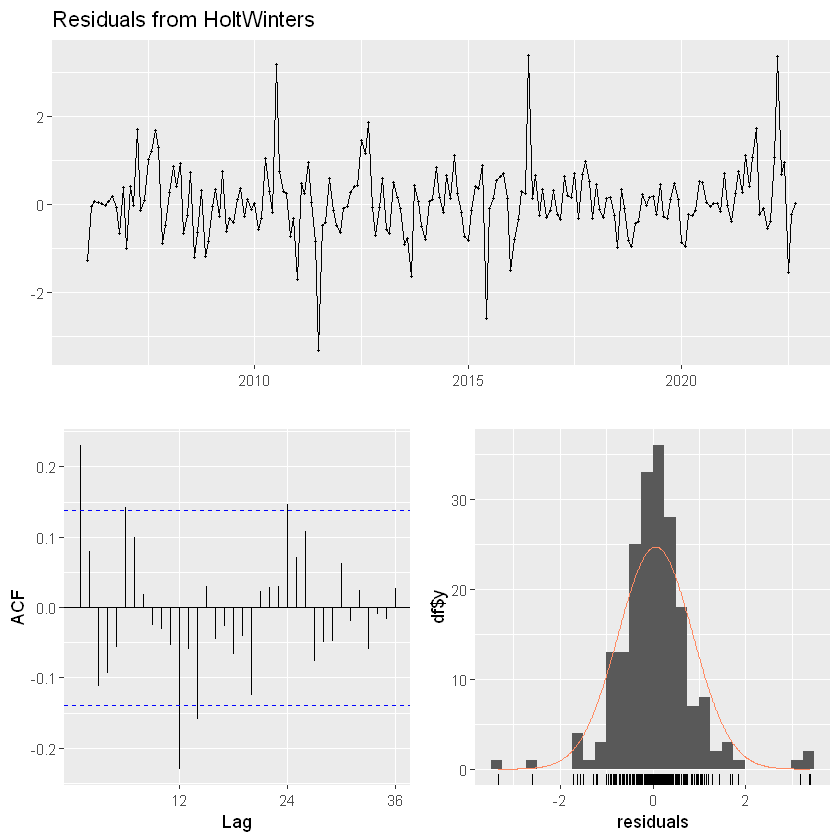

In [9]:
checkresiduals(hw_model)

In [10]:
residual_model1 = residuals(hw_model)

In [11]:
jarque.bera.test(residual_model1)
white.test(residual_model1)
Box.test(residual_model1, lag = 4, type = "Ljung-Box")



	Jarque Bera Test

data:  residual_model1
X-squared = 181.6, df = 2, p-value < 2.2e-16



	White Neural Network Test

data:  residual_model1
X-squared = 2.4357, df = 2, p-value = 0.2959



	Box-Ljung test

data:  residual_model1
X-squared = 16.503, df = 4, p-value = 0.002413


In [12]:
hw_forecast <- predict(hw_model, n.ahead=5)

In [13]:
hw_forecast

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2022,,,,,,,,,,16.35540,16.64378,17.35470
2023,18.24798,19.06057,,,,,,,,,,


In [14]:
RI_test

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2022,,,,,,,,,,15.32,16.76,16.37
2023,15.07,15.52,,,,,,,,,,


In [15]:
hw_forecast <- predict(hw_model, n.ahead=12)
hw_forecast

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2022,,,,,,,,,,16.35540,16.64378,17.35470
2023,18.24798,19.06057,20.05982,20.93011,21.06850,21.61436,21.87142,22.42657,22.97030,,,


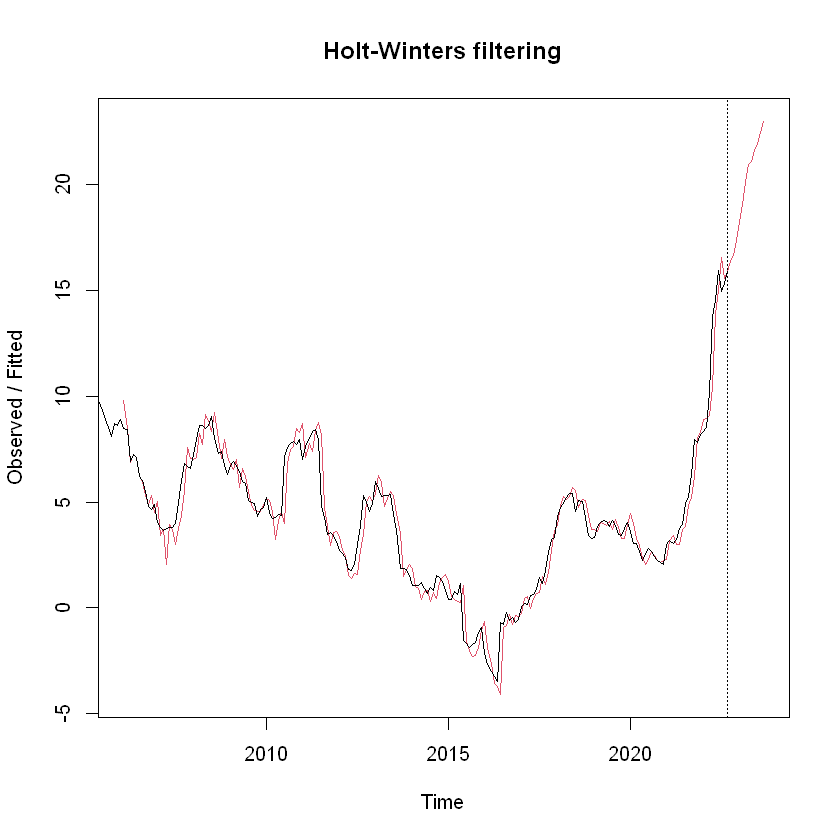

In [16]:
plot(hw_model, hw_forecast)

In [ ]:
autoplot(r_inf, series="Data") +
  autolayer(r_inf_arima %>% forecast(h=12), series="Arima", PI=F) +
  ggtitle("Arima vs ETS") +
  xlab("An") + ylab("% rata inflatiei") +
  scale_colour_manual(values=c("gray","blue",),
                      breaks=c("Data","Arima","ETS"))

In [17]:
forecast_train <- fitted(hw_model)

In [18]:
forecast_train

,xhat,level,trend,season
Feb 2006,9.77685897,9.50498106,-0.243747086,0.515625000
Mar 2006,8.47007518,8.12601149,-0.337394647,0.681458333
Apr 2006,6.84864582,7.73562060,-0.341766450,-0.545208333
May 2006,7.22043483,7.45680034,-0.336573849,0.100208333
Jun 2006,7.09497658,7.15512952,-0.333694604,0.273541667
Jul 2006,6.23437841,6.83468806,-0.332601317,-0.267708333
Aug 2006,5.95224723,6.48058095,-0.334375387,-0.193958333
Sep 2006,5.31173818,6.20597471,-0.329444869,-0.564791667
Oct 2006,4.88338952,6.02496460,-0.317200086,-0.824375000
Nov 2006,5.32905764,5.63420117,-0.323268525,0.018125000


In [19]:
log_likelihood <- logLik(hw_model)
aic <- AIC(hw_model)
bic <- BIC(hw_model)

log_likelihood
aic
bic

ERROR: Error in UseMethod("logLik"): no applicable method for 'logLik' applied to an object of class "HoltWinters"


In [20]:
library(stats)
library(forecast)

# Ajustarea modelului de Holt-Winters
model <- ets(RI_train)

# Calculare log-likelihood
log_likelihood <- logLik(model$fit)

# Calculare AIC
aic <- AIC(model)

# Calculare BIC
bic <- BIC(model)


ERROR: Error in UseMethod("logLik"): no applicable method for 'logLik' applied to an object of class "list"


In [21]:
model

ETS(A,Ad,N) 

Call:
 ets(y = RI_train) 

  Smoothing parameters:
    alpha = 0.9998 
    beta  = 0.2191 
    phi   = 0.8 

  Initial states:
    l = 8.7536 
    b = 0.402 

  sigma:  0.6783

     AIC     AICc      BIC 
977.9325 978.3423 998.0720 

In [22]:
hw_model


Holt-Winters exponential smoothing with trend and additive seasonal component.

Call:
HoltWinters(x = RI_train, alpha = NULL, beta = NULL, gamma = NULL,     seasonal = c("additive", "multiplicative"), start.periods = 2,     l.start = NULL, b.start = NULL, s.start = NULL, optim.start = c(alpha = 0.3,         beta = 0.1, gamma = 0.1), optim.control = list())

Smoothing parameters:
 alpha: 0.8821654
 beta : 0.08249269
 gamma: 1

Coefficients:
            [,1]
a   15.930427615
b    0.590858469
s1  -0.165884814
s2  -0.468368171
s3  -0.348303480
s4  -0.045877218
s5   0.175846026
s6   0.584244213
s7   0.863674294
s8   0.411202489
s9   0.366205104
s10  0.032407855
s11 -0.003304317
s12 -0.050427615